In [1]:
print("jai shree ram")

jai shree ram


In [2]:
# let's import the required liberary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cols=['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
      'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df=pd.read_csv("breast-cancer-wisconsin.data.txt",header=None,names=cols)

In [4]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
# check information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
df.shape

(699, 11)

In [7]:
df.drop("Id",axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [9]:
# let's convert the object type column into numberic form

In [10]:
df["Bare_Nuclei"]=pd.to_numeric(df["Bare_Nuclei"],errors="coerce")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [12]:
# check null values
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [13]:
df.isnull().sum()/df.shape[0]*100

Clump_thickness                0.000000
Uniformity_Cell_Size           0.000000
Uniformity_Cell_Shape          0.000000
Marginal_Adhesion              0.000000
Single_Epithelial_Cell_Size    0.000000
Bare_Nuclei                    2.288984
Bland_Chromatin                0.000000
Normal_Nucleoli                0.000000
Mitoses                        0.000000
Class                          0.000000
dtype: float64

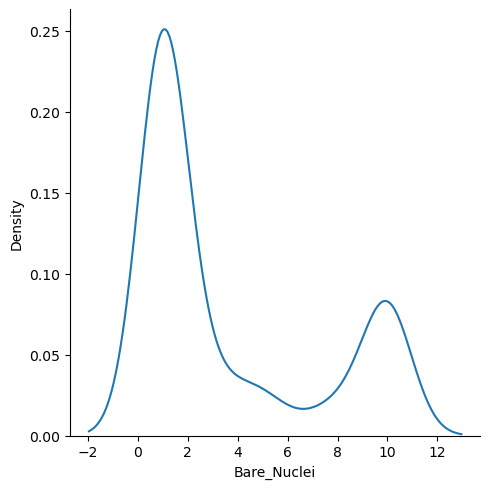

In [14]:
sns.displot(df["Bare_Nuclei"],kind="kde");

In [15]:
df.fillna(df["Bare_Nuclei"].median(),inplace=True)

In [16]:
df.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [17]:
co=df.corr()

<Axes: >

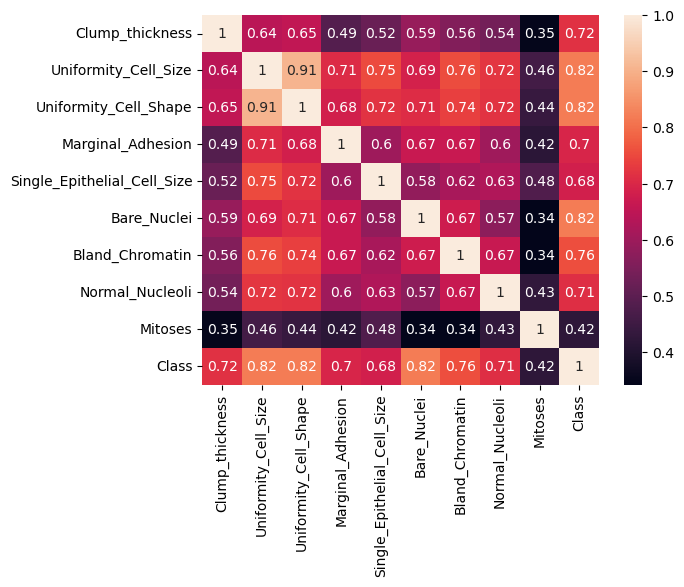

In [18]:
sns.heatmap(co, annot=True,fmt='.2g')

In [19]:
x=df.drop("Class",axis=1)
y=df["Class"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=40)

In [22]:
x_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
396,3,1,1,1,2,1.0,3,1,1
628,2,1,1,1,2,1.0,1,1,1
358,8,10,5,3,8,4.0,4,10,3
624,5,1,1,2,1,1.0,2,1,1


In [23]:
y_train.head()

0      2
396    2
628    2
358    4
624    2
Name: Class, dtype: int64

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
obj=KNeighborsClassifier(n_neighbors=6)

In [26]:
obj.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [27]:
obj.score(x_train,y_train)

0.9793322734499205

In [28]:
train_per=obj.predict(x_train)
test_per=obj.predict(x_test)

In [29]:
patient1=x_test.iloc[0:1,:]

In [30]:
patient1

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
535,1,1,3,2,2,1.0,3,1,1


In [31]:
result=obj.predict(patient1)

In [32]:
if result==2:
    print("patient is out of dangour")
else:
    print("patient is suffering with malignant tumar")

patient is out of dangour


In [33]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [34]:
#df

In [35]:
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,recall_score,precision_score

In [36]:
accuracy_score(y_test,test_per)

0.9428571428571428

In [37]:
print(classification_report(y_train,train_per))

              precision    recall  f1-score   support

           2       0.98      0.99      0.98       411
           4       0.97      0.97      0.97       218

    accuracy                           0.98       629
   macro avg       0.98      0.98      0.98       629
weighted avg       0.98      0.98      0.98       629



In [38]:
confusion_matrix(y_train,train_per)

array([[405,   6],
       [  7, 211]], dtype=int64)